<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.611914,24.226605,86.984811,-1.618566,140.204763,141.115871,-0.911108
1,0.0,1.0,29.138724,96.537872,42.075743,0.168684,177.921023,178.065545,-0.144522
2,0.0,2.0,62.117946,94.679558,33.673504,-1.474471,198.996537,201.114082,-2.117545
3,0.0,3.0,85.902523,47.693959,96.724666,0.890352,241.211500,239.330450,1.881049
4,0.0,4.0,66.120157,99.294665,26.830770,1.488926,203.734518,203.081443,0.653074
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.236235,48.367704,37.274566,0.946244,145.824750,143.566904,2.257846
19996,999.0,16.0,40.823075,91.148326,61.332289,-2.585073,200.718618,199.413615,1.305003
19997,999.0,17.0,56.467202,25.916894,59.759930,-3.391599,148.752426,151.637193,-2.884767
19998,999.0,18.0,84.737496,58.402519,69.884911,-1.088331,221.936595,223.708837,-1.772242


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    20.611914  24.226605  86.984811  ...  140.204763  141.115871 -0.911108
      1.0    29.138724  96.537872  42.075743  ...  177.921023  178.065545 -0.144522
      2.0    62.117946  94.679558  33.673504  ...  198.996537  201.114082 -2.117545
      3.0    85.902523  47.693959  96.724666  ...  241.211500  239.330450  1.881049
      4.0    66.120157  99.294665  26.830770  ...  203.734518  203.081443  0.653074
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.236235  48.367704  37.274566  ...  145.824750  143.566904  2.257846
      16.0   40.823075  91.148326  61.332289  ...  200.718618  199.413615  1.305003
      17.0   56.467202  25.916894  59.759930  ...  148.752426  151.637193 -2.884767
      18.0   84.737496  58.402519  69.884911  ...  221.936595  223.708837 -1.772242
      19.0   27.536252  20.722078  89.191491  ...  142.969978  143.965818 -0.995840

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    20.611914  24.226605  86.984811  ...  140.204763  141.115871 -0.911108
      1.0    29.138724  96.537872  42.075743  ...  177.921023  178.065545 -0.144522
      2.0    62.117946  94.679558  33.673504  ...  198.996537  201.114082 -2.117545
      3.0    85.902523  47.693959  96.724666  ...  241.211500  239.330450  1.881049
      4.0    66.120157  99.294665  26.830770  ...  203.734518  203.081443  0.653074
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.236235  48.367704  37.274566  ...  145.824750  143.566904  2.257846
      16.0   40.823075  91.148326  61.332289  ...  200.718618  199.413615  1.305003
      17.0   56.467202  25.916894  59.759930  ...  148.752426  151.637193 -2.884767
      18.0   84.737496  58.402519  69.884911  ...  221.936595  223.708837 -1.772242
      19.0   27.536252  20.722078  89.191491  ...  142.969978  143.965818 -0.995840

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.611914,24.226605,86.984811,-1.618566,140.204763,141.115871,-0.911108
1,0.0,1.0,29.138724,96.537872,42.075743,0.168684,177.921023,178.065545,-0.144522
2,0.0,2.0,62.117946,94.679558,33.673504,-1.474471,198.996537,201.114082,-2.117545
3,0.0,3.0,85.902523,47.693959,96.724666,0.890352,241.211500,239.330450,1.881049
4,0.0,4.0,66.120157,99.294665,26.830770,1.488926,203.734518,203.081443,0.653074
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.236235,48.367704,37.274566,0.946244,145.824750,143.566904,2.257846
19996,999.0,16.0,40.823075,91.148326,61.332289,-2.585073,200.718618,199.413615,1.305003
19997,999.0,17.0,56.467202,25.916894,59.759930,-3.391599,148.752426,151.637193,-2.884767
19998,999.0,18.0,84.737496,58.402519,69.884911,-1.088331,221.936595,223.708837,-1.772242


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    20.611914  24.226605  86.984811  ...  140.204763  141.115871 -0.911108
      1.0    29.138724  96.537872  42.075743  ...  177.921023  178.065545 -0.144522
      2.0    62.117946  94.679558  33.673504  ...  198.996537  201.114082 -2.117545
      3.0    85.902523  47.693959  96.724666  ...  241.211500  239.330450  1.881049
      4.0    66.120157  99.294665  26.830770  ...  203.734518  203.081443  0.653074
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.236235  48.367704  37.274566  ...  145.824750  143.566904  2.257846
      16.0   40.823075  91.148326  61.332289  ...  200.718618  199.413615  1.305003
      17.0   56.467202  25.916894  59.759930  ...  148.752426  151.637193 -2.884767
      18.0   84.737496  58.402519  69.884911  ...  221.936595  223.708837 -1.772242
      19.0   27.536252  20.722078  89.191491  ...  142.969978  143.965818 -0.995840

[20000 rows x 7 columns]

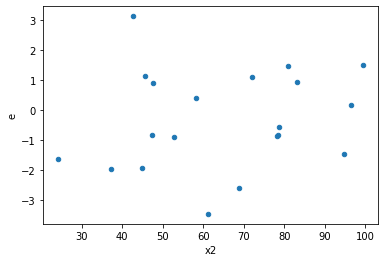

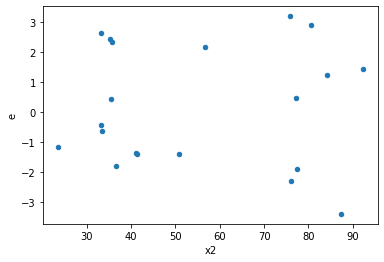

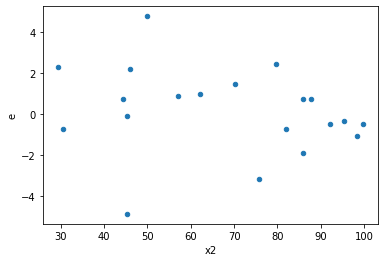

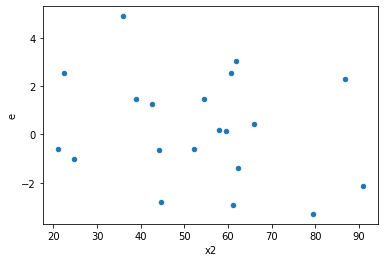

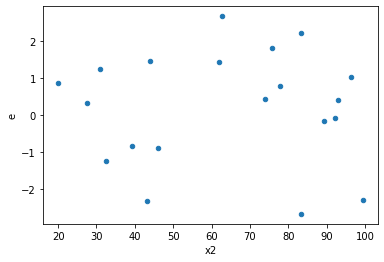

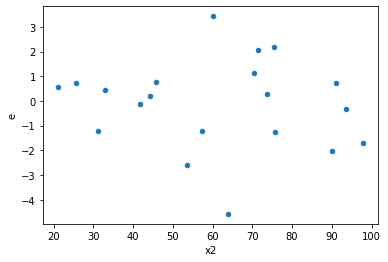

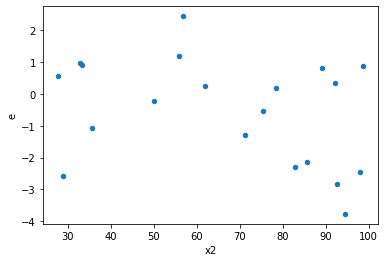

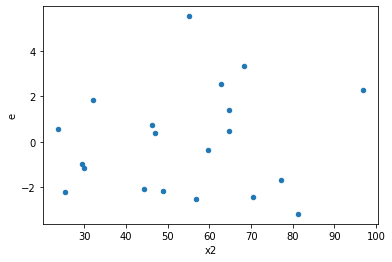

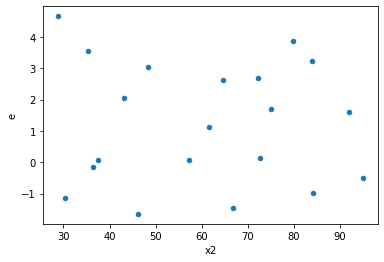

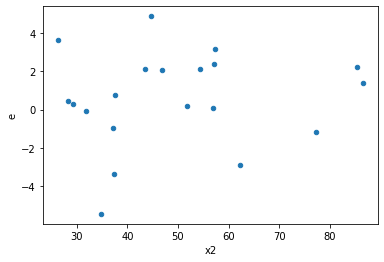

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,7.0,14.531629214770192,26.267916933221365,2.075947030681456,3.7525595618887664,1.8076374331463272,0.4529083433177512,0.7735458283411244,0.2264541716588756,Reject001=1 : Homoscedasticity
1.0,8.0,6.0,27.320465525695443,23.03445840523441,3.4150581907119304,3.839076400872402,1.1241613426423276,0.9121023223022928,0.5439488388488536,0.4560511611511464,Reject001=1 : Homoscedasticity
2.0,12.0,2.0,23.587866684733513,42.09046374393733,1.965655557061126,21.045231871968664,10.70646980666014,0.1770332782717985,0.9114833608641008,0.08851663913589924,Reject001=1 : Homoscedasticity
3.0,8.0,6.0,11.737025929681243,25.301085726171546,1.4671282412101554,4.216847621028591,2.874218832806558,0.21518637084727277,0.8924068145763636,0.10759318542363638,Reject001=1 : Homoscedasticity
4.0,6.0,8.0,9.736324082636408,14.45996746281258,1.6227206804394012,1.8074959328515725,1.1138675649108865,0.8622306305988756,0.5688846847005622,0.4311153152994378,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,26.913918023604158,35.82116537163145,3.844845431943451,5.1173093388044935,1.3309532019907107,0.7155718549466354,0.6422140725266823,0.3577859274733177,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,20.80591754442317,31.224250593971572,2.9722739349175957,4.460607227710224,1.5007389377230775,0.6054664795606235,0.6972667602196883,0.30273323978031175,Reject001=1 : Homoscedasticity
10.0,9.0,5.0,13.049879219851734,29.37532293387448,1.449986579983526,5.875064586774895,4.051806180745235,0.13770224020782584,0.9311488798960871,0.06885112010391292,Reject001=1 : Homoscedasticity
12.0,6.0,8.0,19.4105503532594,42.76977272508961,3.235091725543233,5.346221590636201,1.652571872514208,0.4991508890383942,0.7504245554808029,0.2495754445191971,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,14.531629214770192,26.267916933221365,2.075947030681456,3.7525595618887664,1.8076374331463272,0.4529083433177512,Reject001=1 : Homoscedasticity
1.0,8.0,6.0,27.320465525695443,23.03445840523441,3.4150581907119304,3.839076400872402,1.1241613426423276,0.9121023223022928,Reject001=1 : Homoscedasticity
2.0,12.0,2.0,23.587866684733513,42.09046374393733,1.965655557061126,21.045231871968664,10.70646980666014,0.1770332782717985,Reject001=1 : Homoscedasticity
3.0,8.0,6.0,11.737025929681243,25.301085726171546,1.4671282412101554,4.216847621028591,2.874218832806558,0.21518637084727277,Reject001=1 : Homoscedasticity
4.0,6.0,8.0,9.736324082636408,14.45996746281258,1.6227206804394012,1.8074959328515725,1.1138675649108865,0.8622306305988756,Reject001=1 : Homoscedasticity
5.0,8.0,6.0,28.20483434649547,9.509576384261216,3.525604293311934,1.5849293973768692,0.44954829456711237,0.29234153044600664,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,14.729403117823102,18.01869144892785,2.454900519637184,2.2523364311159813,0.9174858260443319,0.9429680567221711,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,26.913918023604158,35.82116537163145,3.844845431943451,5.1173093388044935,1.3309532019907107,0.7155718549466354,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,20.80591754442317,31.224250593971572,2.9722739349175957,4.460607227710224,1.5007389377230775,0.6054664795606235,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      932
Reject001=0 : Heteroscedasticity     68
Name: Result_test, dtype: int64